<a href="https://colab.research.google.com/github/Sujitdesai/Data_Science_Projects/blob/main/Tweet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
# Set styling
sns.set(style= "ticks")
plt.style.use("fivethirtyeight")
import plotly.express as px
import plotly.graph_objs as go
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

#nltk
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize

# warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [ ]:
df.dropna(inplace=True)

In [ ]:
comDf = df.append(test, ignore_index=True)

In [ ]:
comDf

,tweet_id,tweet,sentiment
0,1701,#sxswnui #sxsw #apple defining language of tou...,1.0
1,1851,Learning ab Google doodles! All doodles should...,1.0
2,2689,one of the most in-your-face ex. of stealing t...,2.0
3,4525,This iPhone #SXSW app would b pretty awesome i...,0.0
4,3604,Line outside the Apple store in Austin waiting...,1.0
...,...,...,...
9087,1550,@mention @mention @mention Hmmm....how fast ca...,NaN
9088,1933,Samsung Galaxy S II Appears At FCC And Team An...,NaN
9089,9052,@mention You could buy a new iPad 2 tmrw at th...,NaN
9090,4219,Wow very long queue of people at apple pop up ...,NaN


In [ ]:
comDf.columns

Index(['tweet_id', 'tweet', 'sentiment'], dtype='object')

In [ ]:
comDf['cleaned_tweet'] = comDf['tweet'].str.lower()

In [ ]:
comDf

,tweet_id,tweet,sentiment,cleaned_tweet
0,1701,#sxswnui #sxsw #apple defining language of tou...,1.0,#sxswnui #sxsw #apple defining language of tou...
1,1851,Learning ab Google doodles! All doodles should...,1.0,learning ab google doodles! all doodles should...
2,2689,one of the most in-your-face ex. of stealing t...,2.0,one of the most in-your-face ex. of stealing t...
3,4525,This iPhone #SXSW app would b pretty awesome i...,0.0,this iphone #sxsw app would b pretty awesome i...
4,3604,Line outside the Apple store in Austin waiting...,1.0,line outside the apple store in austin waiting...
...,...,...,...,...
9087,1550,@mention @mention @mention Hmmm....how fast ca...,NaN,@mention @mention @mention hmmm....how fast ca...
9088,1933,Samsung Galaxy S II Appears At FCC And Team An...,NaN,samsung galaxy s ii appears at fcc and team an...
9089,9052,@mention You could buy a new iPad 2 tmrw at th...,NaN,@mention you could buy a new ipad 2 tmrw at th...
9090,4219,Wow very long queue of people at apple pop up ...,NaN,wow very long queue of people at apple pop up ...


In [ ]:
import re
def remove_pat(s1, pat, nstr):
    return re.sub(pat, nstr, s1)
comDf['new_tweet'] = np.vectorize(remove_pat)(comDf['cleaned_tweet'], "@[\w]*", "")

In [ ]:
comDf

,tweet_id,tweet,sentiment,cleaned_tweet,new_tweet
0,1701,#sxswnui #sxsw #apple defining language of tou...,1.0,#sxswnui #sxsw #apple defining language of tou...,#sxswnui #sxsw #apple defining language of tou...
1,1851,Learning ab Google doodles! All doodles should...,1.0,learning ab google doodles! all doodles should...,learning ab google doodles! all doodles should...
2,2689,one of the most in-your-face ex. of stealing t...,2.0,one of the most in-your-face ex. of stealing t...,one of the most in-your-face ex. of stealing t...
3,4525,This iPhone #SXSW app would b pretty awesome i...,0.0,this iphone #sxsw app would b pretty awesome i...,this iphone #sxsw app would b pretty awesome i...
4,3604,Line outside the Apple store in Austin waiting...,1.0,line outside the apple store in austin waiting...,line outside the apple store in austin waiting...
...,...,...,...,...,...
9087,1550,@mention @mention @mention Hmmm....how fast ca...,NaN,@mention @mention @mention hmmm....how fast ca...,hmmm....how fast can #apple build a new sto...
9088,1933,Samsung Galaxy S II Appears At FCC And Team An...,NaN,samsung galaxy s ii appears at fcc and team an...,samsung galaxy s ii appears at fcc and team an...
9089,9052,@mention You could buy a new iPad 2 tmrw at th...,NaN,@mention you could buy a new ipad 2 tmrw at th...,you could buy a new ipad 2 tmrw at the apple ...
9090,4219,Wow very long queue of people at apple pop up ...,NaN,wow very long queue of people at apple pop up ...,wow very long queue of people at apple pop up ...


In [ ]:
comDf['new_tweet'] = np.vectorize(remove_pat)(comDf['new_tweet'], "[^a-zA-Z#_]+", " ")
comDf

,tweet_id,tweet,sentiment,cleaned_tweet,new_tweet
0,1701,#sxswnui #sxsw #apple defining language of tou...,1.0,#sxswnui #sxsw #apple defining language of tou...,#sxswnui #sxsw #apple defining language of tou...
1,1851,Learning ab Google doodles! All doodles should...,1.0,learning ab google doodles! all doodles should...,learning ab google doodles all doodles should ...
2,2689,one of the most in-your-face ex. of stealing t...,2.0,one of the most in-your-face ex. of stealing t...,one of the most in your face ex of stealing th...
3,4525,This iPhone #SXSW app would b pretty awesome i...,0.0,this iphone #sxsw app would b pretty awesome i...,this iphone #sxsw app would b pretty awesome i...
4,3604,Line outside the Apple store in Austin waiting...,1.0,line outside the apple store in austin waiting...,line outside the apple store in austin waiting...
...,...,...,...,...,...
9087,1550,@mention @mention @mention Hmmm....how fast ca...,NaN,@mention @mention @mention hmmm....how fast ca...,hmmm how fast can #apple build a new store in...
9088,1933,Samsung Galaxy S II Appears At FCC And Team An...,NaN,samsung galaxy s ii appears at fcc and team an...,samsung galaxy s ii appears at fcc and team an...
9089,9052,@mention You could buy a new iPad 2 tmrw at th...,NaN,@mention you could buy a new ipad 2 tmrw at th...,you could buy a new ipad tmrw at the apple po...
9090,4219,Wow very long queue of people at apple pop up ...,NaN,wow very long queue of people at apple pop up ...,wow very long queue of people at apple pop up ...


In [ ]:
def m1(s1, pat):
    return " ".join(re.findall(pat, s1))
comDf['hash'] = np.vectorize(m1)(comDf['new_tweet'], r"#(\w+)")
comDf['new_tweet'] = np.vectorize(remove_pat)(comDf['new_tweet'], r"#[a-z]+", "")

In [ ]:
comDf['new_tweet'] = np.vectorize(remove_pat)(comDf['new_tweet'], r"\b[a-z]{1,2}\b", " ")
comDf

,tweet_id,tweet,sentiment,cleaned_tweet,new_tweet,hash
0,1701,#sxswnui #sxsw #apple defining language of tou...,1.0,#sxswnui #sxsw #apple defining language of tou...,defining language touch with different di...,sxswnui sxsw apple
1,1851,Learning ab Google doodles! All doodles should...,1.0,learning ab google doodles! all doodles should...,learning google doodles all doodles should ...,googledoodle sxsw
2,2689,one of the most in-your-face ex. of stealing t...,2.0,one of the most in-your-face ex. of stealing t...,one the most your face stealing the sh...,sxsw
3,4525,This iPhone #SXSW app would b pretty awesome i...,0.0,this iphone #sxsw app would b pretty awesome i...,this iphone app would pretty awesome di...,sxsw fuckit illmakeitwork
4,3604,Line outside the Apple store in Austin waiting...,1.0,line outside the apple store in austin waiting...,line outside the apple store austin waiting ...,sxsw
...,...,...,...,...,...,...
9087,1550,@mention @mention @mention Hmmm....how fast ca...,NaN,@mention @mention @mention hmmm....how fast ca...,hmmm how fast can build new store time f...,apple sxsw
9088,1933,Samsung Galaxy S II Appears At FCC And Team An...,NaN,samsung galaxy s ii appears at fcc and team an...,samsung galaxy appears fcc and team andr...,sxsw
9089,9052,@mention You could buy a new iPad 2 tmrw at th...,NaN,@mention you could buy a new ipad 2 tmrw at th...,you could buy new ipad tmrw the apple pop...,sxsw
9090,4219,Wow very long queue of people at apple pop up ...,NaN,wow very long queue of people at apple pop up ...,wow very long queue people apple pop sto...,sxsw nokiaconnects


In [ ]:
all_words = " ".join([i for i in comDf['new_tweet']])

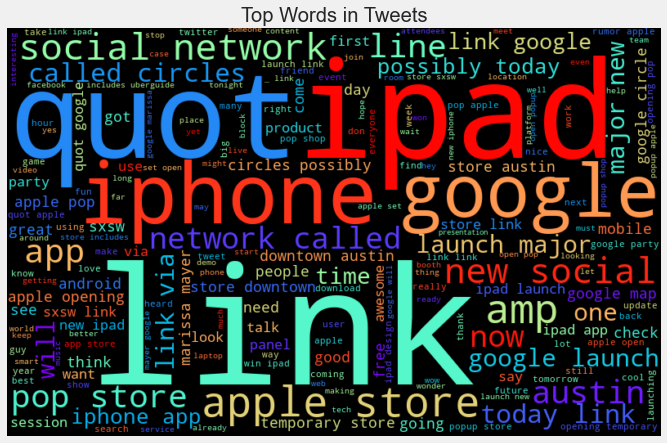

In [ ]:
# Word Cloud
from wordcloud import WordCloud
pos_wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=200,\
                          colormap='rainbow').generate(all_words)

plt.figure(figsize=(15, 7))
plt.imshow(pos_wordcloud, interpolation='bilinear')
plt.title("Top Words in Tweets")
plt.axis('off')
plt.show()

In [ ]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words

In [ ]:
corpus = get_corpus(comDf['new_tweet'])

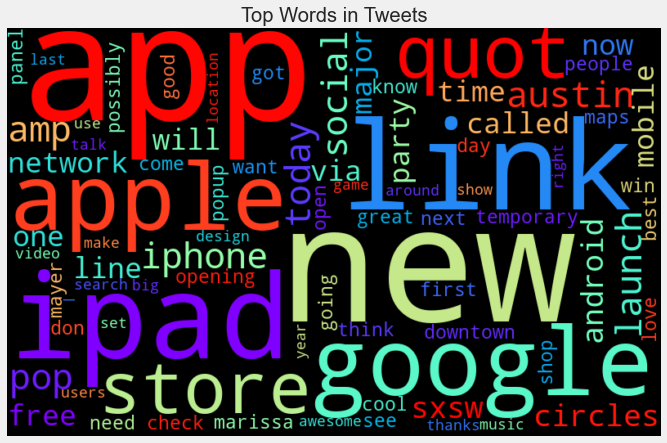

In [ ]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(125)
most_common = dict(most_common)

all_words = [' '.join([x for x in most_common.keys()])]

# Word Cloud
from wordcloud import WordCloud
pos_wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=200,\
                          colormap='rainbow').generate(all_words[0])

plt.figure(figsize=(15, 7))
plt.imshow(pos_wordcloud, interpolation='bilinear')
plt.title("Top Words in Tweets")
plt.axis('off')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
df = comDf[comDf['sentiment'].isin([1, 2, 0, 3])]
df['new_tweet'] += df['hash']
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=2, max_features=3000, stop_words='english', ngram_range=(1,2))
bow = tfidf_vectorizer.fit_transform(df['new_tweet'])
bow.shape

(7273, 3000)

In [ ]:
# Creating Bar chart of claim counts
# CountPlot
temp = df["sentiment"].value_counts()/len(df)
fig = px.bar(x=["Neutral", "Positive", "Negative", "Can't Tell"], y=df["sentiment"].value_counts(),\
             template='presentation', text=[f'{round(temp[1]*100, 2)}%', f'{round(temp[2]*100, 2)}%', f'{round(temp[0]*100, 2)}%', f'{round(temp[3]*100, 2)}%'],\
             title='Claim Counts', height=400, width=500)

fig.update_traces(marker= dict(color=['rgb(95, 111, 176)', 'rgb(119, 221, 119)', 'rgb(250, 98, 89)', 'rgb(255, 255, 255)'],\
                               line=dict(color='#000000', width=2), opacity=0.8)
                 )
fig.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

X = bow
y = df['sentiment']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)#, stratify=y)

In [ ]:
#SMOTE
from imblearn.over_sampling import SMOTE, ADASYN
X_train_res, y_train_res = SMOTE().fit_resample(X_train, y_train)

print(f'Before OverSampling, label 0: {sum(y == 0)}')
print(f'Before OverSampling, label 1: {sum(y == 1)}')
print(f'Before OverSampling, label 2: {sum(y == 2)}')
print(f'Before OverSampling, label 3: {sum(y == 3)}\n')

print(f'After OverSampling, the shape of X_train: {X_train_res.shape}')
print(f'After OverSampling, the shape of y_train: {y_train_res.shape}\n')

print(f'After OverSampling, label 0: {sum(y_train_res == 0)}')
print(f'After OverSampling, label 1: {sum(y_train_res == 1)}')
print(f'After OverSampling, label 2: {sum(y_train_res == 2)}')
print(f'After OverSampling, label 3: {sum(y_train_res == 3)}')

Before OverSampling, label 0: 456
Before OverSampling, label 1: 4310
Before OverSampling, label 2: 2382
Before OverSampling, label 3: 125

After OverSampling, the shape of X_train: (13844, 3000)
After OverSampling, the shape of y_train: (13844,)

After OverSampling, label 0: 3461
After OverSampling, label 1: 3461
After OverSampling, label 2: 3461
After OverSampling, label 3: 3461


In [ ]:
def print_results(y_test, y_pred, model='Results:'):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
    import scikitplot as skplt
    print(model)
    print(f"Accuracy is {round(accuracy_score(y_test, y_pred), 2)}")
#     print(f"\nPrecision-score is {round(precision_score(y_test, y_pred), 2)}")
#     print(f"\nRecall-score is {round(recall_score(y_test, y_pred), 2)}")
    print(f"\nF1-score is {round(f1_score(y_test, y_pred, average='weighted'), 2)}")
    print(f"\nclassification Report:\n {classification_report(y_test, y_pred)}\n")
    skplt.metrics.plot_confusion_matrix(y_test, y_pred, title=f"Confusion Matrix for {model} Classifier")
    plt.show()

Results:
Accuracy is 0.64

F1-score is 0.65

classification Report:
               precision    recall  f1-score   support

         0.0       0.30      0.42      0.35        88
         1.0       0.75      0.72      0.73       849
         2.0       0.60      0.57      0.58       495
         3.0       0.05      0.13      0.07        23

    accuracy                           0.64      1455
   macro avg       0.43      0.46      0.43      1455
weighted avg       0.66      0.64      0.65      1455




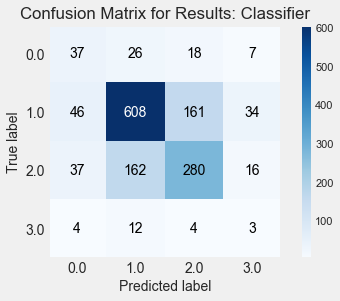

In [ ]:
#Model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=101)
lr.fit(X_train_res, y_train_res)
y_pred_lr = lr.predict(X_test)
print_results(y_test, y_pred_lr)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

NB
Accuracy is 0.55

F1-score is 0.58

classification Report:
               precision    recall  f1-score   support

         0.0       0.24      0.56      0.33        88
         1.0       0.78      0.55      0.65       849
         2.0       0.53      0.56      0.55       495
         3.0       0.02      0.13      0.04        23

    accuracy                           0.55      1455
   macro avg       0.39      0.45      0.39      1455
weighted avg       0.65      0.55      0.58      1455




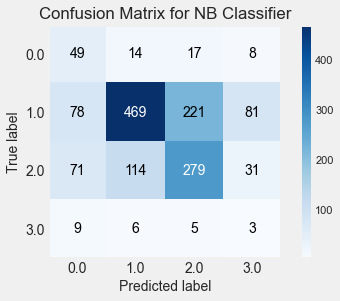

In [ ]:
bayes = MultinomialNB()
bayes.fit(X_train_res.toarray(), y_train_res)
y_pred_bayes = bayes.predict(X_test.toarray())
print_results(y_test, y_pred_bayes, model='NB')

GBC
Accuracy is 0.62

F1-score is 0.63

classification Report:
               precision    recall  f1-score   support

         0.0       0.21      0.33      0.25        88
         1.0       0.72      0.76      0.74       849
         2.0       0.61      0.48      0.54       495
         3.0       0.00      0.00      0.00        23

    accuracy                           0.62      1455
   macro avg       0.38      0.39      0.38      1455
weighted avg       0.64      0.62      0.63      1455




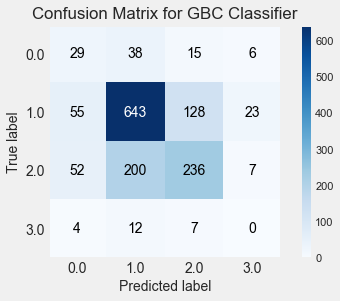

In [ ]:
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train_res, y_train_res)
y_pred_gbc = gbc.predict(X_test)
print_results(y_test, y_pred_gbc, model='GBC')

DT
Accuracy is 0.62

F1-score is 0.62

classification Report:
               precision    recall  f1-score   support

         0.0       0.28      0.28      0.28        88
         1.0       0.71      0.75      0.73       849
         2.0       0.57      0.50      0.53       495
         3.0       0.03      0.04      0.03        23

    accuracy                           0.62      1455
   macro avg       0.40      0.39      0.39      1455
weighted avg       0.63      0.62      0.62      1455




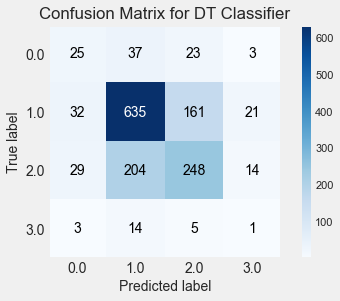

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_res, y_train_res)
y_pred_dt = dt.predict(X_test)
print_results(y_test, y_pred_dt, model='DT')

RF
Accuracy is 0.67

F1-score is 0.65

classification Report:
               precision    recall  f1-score   support

         0.0       0.48      0.26      0.34        88
         1.0       0.70      0.83      0.76       849
         2.0       0.64      0.50      0.56       495
         3.0       0.06      0.04      0.05        23

    accuracy                           0.67      1455
   macro avg       0.47      0.41      0.43      1455
weighted avg       0.65      0.67      0.65      1455




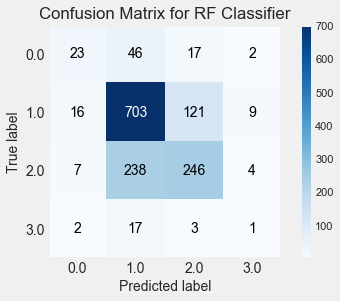

In [ ]:
rf = RandomForestClassifier(n_jobs=-1, random_state=42)
rf.fit(X_train_res, y_train_res)
y_pred_rf = rf.predict(X_test)
print_results(y_test, y_pred_rf, model='RF')

ET
Accuracy is 0.67

F1-score is 0.66

classification Report:
               precision    recall  f1-score   support

         0.0       0.43      0.28      0.34        88
         1.0       0.70      0.84      0.77       849
         2.0       0.66      0.48      0.56       495
         3.0       0.06      0.04      0.05        23

    accuracy                           0.67      1455
   macro avg       0.46      0.41      0.43      1455
weighted avg       0.66      0.67      0.66      1455




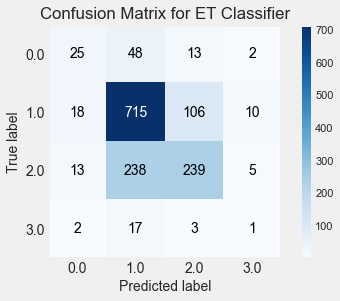

In [ ]:
et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
et.fit(X_train_res, y_train_res)
y_pred_et = et.predict(X_test)
print_results(y_test, y_pred_et, model='ET')

AdaBoost
Accuracy is 0.66

F1-score is 0.64

classification Report:
               precision    recall  f1-score   support

         0.0       0.54      0.25      0.34        88
         1.0       0.68      0.85      0.76       849
         2.0       0.62      0.44      0.51       495
         3.0       0.08      0.04      0.06        23

    accuracy                           0.66      1455
   macro avg       0.48      0.39      0.42      1455
weighted avg       0.64      0.66      0.64      1455




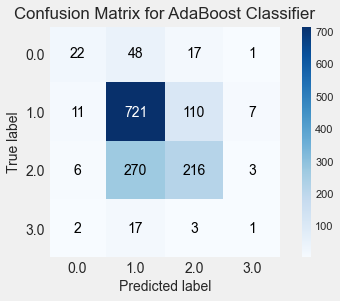

In [ ]:
ada_boost = AdaBoostClassifier(base_estimator=ExtraTreesClassifier(n_jobs=-1, random_state=42), n_estimators=50, random_state=42)
ada_boost.fit(X_train_res, y_train_res)
y_pred_ada_boost = ada_boost.predict(X_test)
print_results(y_test, y_pred_ada_boost, model='AdaBoost')

voting
Accuracy is 0.67

F1-score is 0.66

classification Report:
               precision    recall  f1-score   support

         0.0       0.40      0.33      0.36        88
         1.0       0.71      0.81      0.76       849
         2.0       0.64      0.52      0.57       495
         3.0       0.05      0.04      0.05        23

    accuracy                           0.67      1455
   macro avg       0.45      0.43      0.44      1455
weighted avg       0.66      0.67      0.66      1455




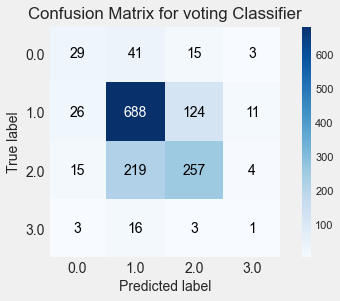

In [ ]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[ ('lr', lr), ('rf', rf), ('et', et)],
                              voting='soft')
voting.fit(X_train_res, y_train_res)
y_pred_voting = voting.predict(X_test)
print_results(y_test, y_pred_voting, model='voting')

In [ ]:
test_bow = tfidf_vectorizer.transform(test_final['new_tweet'])
test_bow.shape

(1819, 3000)

In [ ]:
test_pred_et = et.predict(test_bow)
et_submission = test[['tweet_id']]
et_submission['sentiment'] = test_pred_et
et_submission.to_csv('tweet/et_basic_eda.csv', index=False)

In [ ]:
et_submission['sentiment'].value_counts()

1.0    1306
2.0     444
0.0      57
3.0      12
Name: sentiment, dtype: int64

In [ ]:
test_pred_rf = rf.predict(test_bow)
rf_submission = test[['tweet_id']]
rf_submission['sentiment'] = test_pred_rf
rf_submission.to_csv('tweet/rf_basic_eda.csv', index=False)

In [ ]:
rf_submission['sentiment'].value_counts()

1.0    1319
2.0     441
0.0      53
3.0       6
Name: sentiment, dtype: int64

In [ ]:
test_pred_lr = lr.predict(test_bow)
lr_submission = test[['tweet_id']]
lr_submission['sentiment'] = test_pred_lr
lr_submission.to_csv('tweet/lr_basic_eda.csv', index=False)
lr_submission['sentiment'].value_counts()

1.0    952
2.0    612
0.0    190
3.0     65
Name: sentiment, dtype: int64

In [ ]:
test_pred_gbc = gbc.predict(test_bow)
gbc_submission = test[['tweet_id']]
gbc_submission['sentiment'] = test_pred_gbc
gbc_submission.to_csv('tweet/gbc_basic_eda.csv', index=False)
gbc_submission['sentiment'].value_counts()

1.0    1203
2.0     398
0.0     190
3.0      28
Name: sentiment, dtype: int64

In [ ]:
test_pred_ada_boost = ada_boost.predict(test_bow)
ada_boost_submission = test[['tweet_id']]
ada_boost_submission['sentiment'] = test_pred_ada_boost
ada_boost_submission.to_csv('tweet/ada_boost_basic_eda.csv', index=False)
ada_boost_submission['sentiment'].value_counts()

1.0    1332
2.0     435
0.0      45
3.0       7
Name: sentiment, dtype: int64

In [ ]:
test_pred_dt = dt.predict(test_bow)
dt_submission = test[['tweet_id']]
dt_submission['sentiment'] = test_pred_dt
dt_submission.to_csv('tweet/dt_basic_eda.csv', index=False)
dt_submission['sentiment'].value_counts()

1.0    1131
2.0     543
0.0     104
3.0      41
Name: sentiment, dtype: int64

In [ ]:
test_pred_voting = voting.predict(test_bow)
voting_submission = test[['tweet_id']]
voting_submission['sentiment'] = test_pred_voting
voting_submission.to_csv('tweet/voting_basic_eda.csv', index=False)
voting_submission['sentiment'].value_counts()

1.0    1221
2.0     507
0.0      77
3.0      14
Name: sentiment, dtype: int64